In [3]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc,
                             precision_recall_curve)
import matplotlib.pyplot as plt
import os
print("Libraries imported. Running in path:", os.getcwd())


Libraries imported. Running in path: C:\Users\Monisha


In [4]:
# Load Breast Cancer dataset and create a DataFrame
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = malignant, 1 = benign (scikit-learn convention)

print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())

# quick glance
X.head()


Features shape: (569, 30)
Target distribution:
 target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
## Exploratory Data Analysis (EDA)

- Inspect summary statistics
- Plot histograms for a few selected features
- Correlation heatmap


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


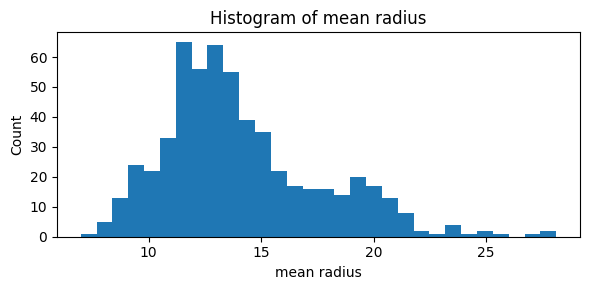

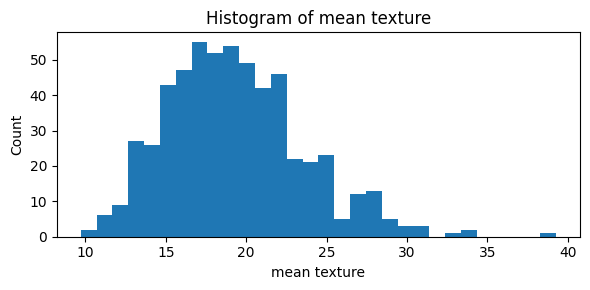

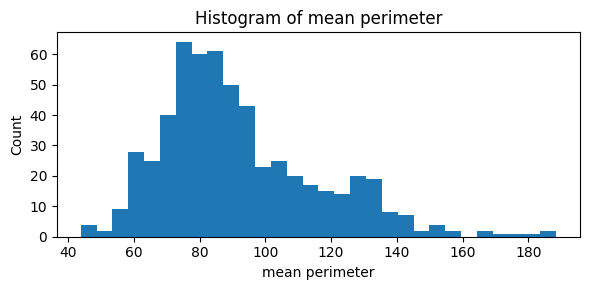

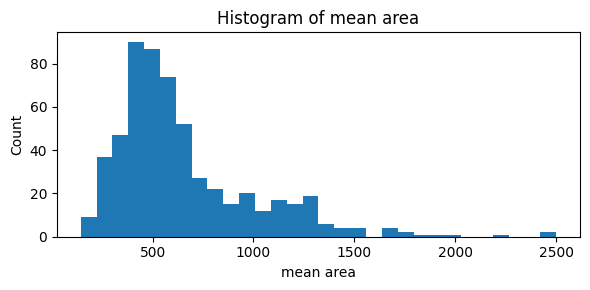

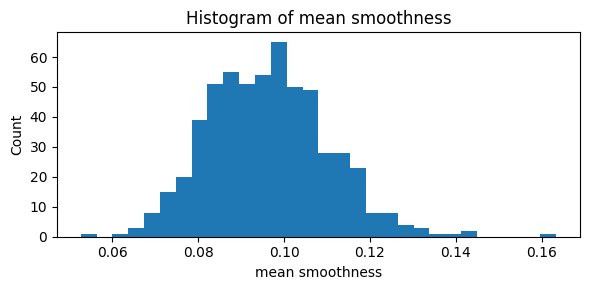

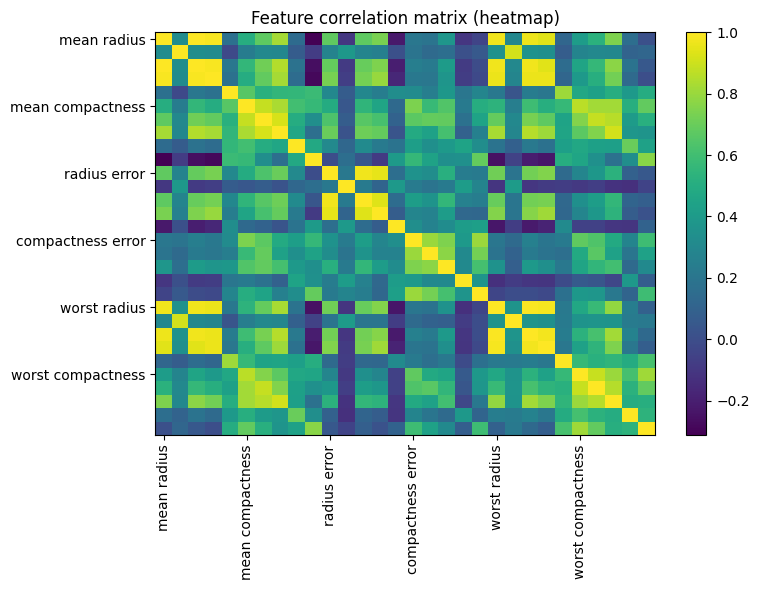

In [5]:
# Summary statistics
display(X.describe().T)

# Plot histograms for a selection of features (each plot separate as required)
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

for feat in features_to_plot:
    plt.figure(figsize=(6,3))
    plt.hist(X[feat], bins=30)
    plt.title(f'Histogram of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Correlation heatmap (matplotlib imshow)
corr = X.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.title('Feature correlation matrix (heatmap)')
# ticks (show reduced ticks to avoid clutter)
ticks = np.arange(0, len(corr.columns), 5)
plt.xticks(ticks, corr.columns[ticks], rotation=90)
plt.yticks(ticks, corr.columns[ticks])
plt.tight_layout()
plt.show()


In [ ]:
## Preprocessing & Train/Test Split

- Standardize features with `StandardScaler`
- Use an 80/20 split


In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)


Scaled shapes: (455, 30) (114, 30)


In [ ]:
## Logistic Regression Training

- We'll use L2 regularization (default) and solver='liblinear' for interpretability.

In [7]:
# Train logistic regression
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

print("Training complete. Coefficients shape:", model.coef_.shape)
# Show top positive/negative coefficients by magnitude
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_.flatten()})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).reset_index(drop=True)
coef_df.head(10)


Training complete. Coefficients shape: (1, 30)


,feature,coefficient,abs_coef
0,worst texture,-1.242272,1.242272
1,radius error,-1.087929,1.087929
2,worst area,-0.979282,0.979282
3,area error,-0.958096,0.958096
4,worst radius,-0.946000,0.946000
5,worst concave points,-0.945296,0.945296
6,worst symmetry,-0.928729,0.928729
7,worst concavity,-0.827180,0.827180
8,worst perimeter,-0.764807,0.764807
9,worst smoothness,-0.759567,0.759567


Confusion matrix:
 [[41  1]
 [ 1 71]]

Classification report:
               precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114



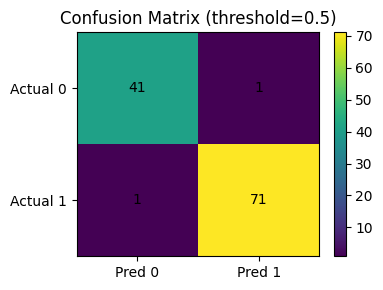

In [8]:
## Evaluation: Predictions, Confusion Matrix, Metrics

# Predictions and probabilities
y_prob = model.predict_proba(X_test_scaled)[:,1]
y_pred = (y_prob >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

# Plot confusion matrix heatmap (matplotlib imshow)
plt.figure(figsize=(4,3))
plt.imshow(cm, interpolation='nearest', aspect='auto')
plt.title('Confusion Matrix (threshold=0.5)')
plt.colorbar()
plt.xticks([0,1], ['Pred 0','Pred 1'])
plt.yticks([0,1], ['Actual 0','Actual 1'])
for (i,j),val in np.ndenumerate(cm):
    plt.text(j, i, str(val), ha='center', va='center')
plt.tight_layout()
plt.show()


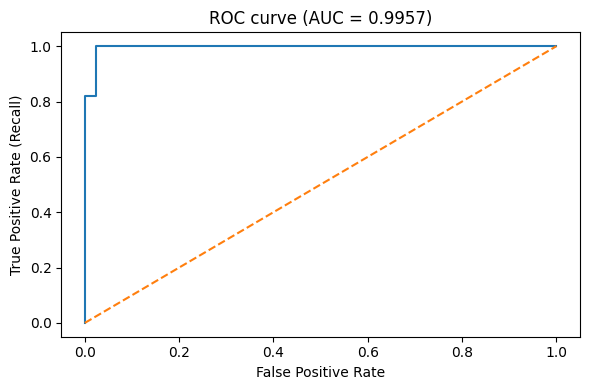

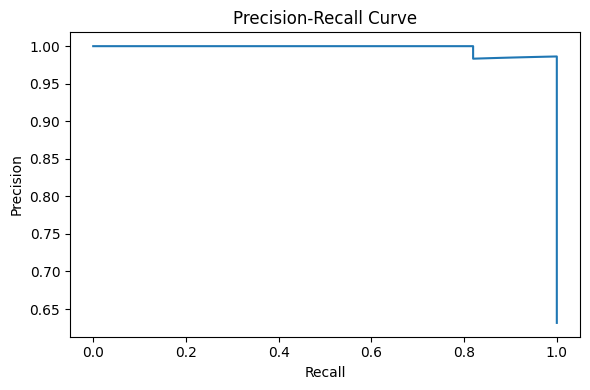

In [9]:
## ROC & Precision-Recall Curves

# ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title(f'ROC curve (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.tight_layout()
plt.show()

# Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.tight_layout()
plt.show()


In [ ]:
## Sigmoid Function Visualization

A short visual to explain how logits map to probabilities via the sigmoid (logistic) function.

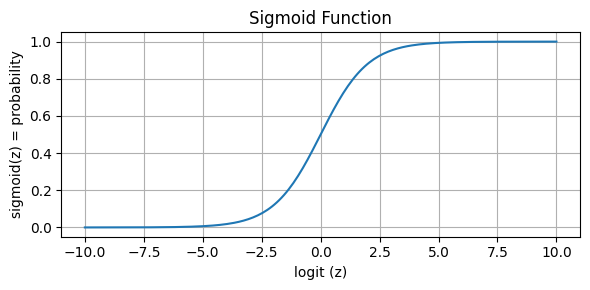

In [10]:
# Sigmoid curve
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
s = sigmoid(z)
plt.figure(figsize=(6,3))
plt.plot(z, s)
plt.title('Sigmoid Function')
plt.xlabel('logit (z)')
plt.ylabel('sigmoid(z) = probability')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## Threshold Tuning Demo

Show how changing threshold affects precision/recall and confusion matrix. This is useful to explain business trade-offs.

,threshold,precision,recall,tn,fp,fn,tp
0,0.0,0.631579,1.000000,0,42,0,72
1,0.1,0.935065,1.000000,37,5,0,72
2,0.2,0.972973,1.000000,40,2,0,72
3,0.3,0.972973,1.000000,40,2,0,72
4,0.4,0.986111,0.986111,41,1,1,71
5,0.5,0.986111,0.986111,41,1,1,71
6,0.6,0.985507,0.944444,41,1,4,68
7,0.7,0.985075,0.916667,41,1,6,66
8,0.8,0.985075,0.916667,41,1,6,66
9,0.9,0.983607,0.833333,41,1,12,60


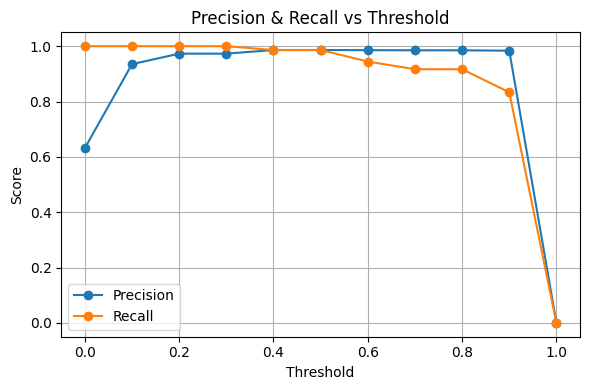

In [11]:
# Evaluate multiple thresholds
thresholds = np.linspace(0.0, 1.0, 11)
results = []
for thr in thresholds:
    y_pred_thr = (y_prob >= thr).astype(int)
    cm_thr = confusion_matrix(y_test, y_pred_thr)
    tn, fp, fn, tp = cm_thr.ravel()
    precision_thr = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall_thr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    results.append({'threshold': thr, 'precision': precision_thr, 'recall': recall_thr, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp})

res_df = pd.DataFrame(results)
display(res_df)

# Plot precision and recall vs threshold
plt.figure(figsize=(6,4))
plt.plot(res_df['threshold'], res_df['precision'], marker='o', label='Precision')
plt.plot(res_df['threshold'], res_df['recall'], marker='o', label='Recall')
plt.title('Precision & Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Coefficient Analysis & Odds Ratios

In [12]:
# Coef df already created earlier; show top features and odds ratios
coef_df_small = coef_df.copy()
coef_df_small['odds_ratio'] = np.exp(coef_df_small['coefficient'])
display(coef_df_small.head(12))

print("\nInterpretation example:\n- A feature with odds_ratio > 1 increases odds of class=1 when it increases, <1 decreases odds.")


,feature,coefficient,abs_coef,odds_ratio
0,worst texture,-1.242272,1.242272,0.288727
1,radius error,-1.087929,1.087929,0.336914
2,worst area,-0.979282,0.979282,0.375581
3,area error,-0.958096,0.958096,0.383623
4,worst radius,-0.946000,0.946000,0.388291
5,worst concave points,-0.945296,0.945296,0.388565
6,worst symmetry,-0.928729,0.928729,0.395055
7,worst concavity,-0.827180,0.827180,0.437281
8,worst perimeter,-0.764807,0.764807,0.465424
9,worst smoothness,-0.759567,0.759567,0.467869



Interpretation example:
- A feature with odds_ratio > 1 increases odds of class=1 when it increases, <1 decreases odds.
